# Fit metallicity gradient demo


Add bla bla about demo data and paper

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
from obs_and_model import Observation,Model,Metallicity_Gradient

## Observations

Let's start by loading our observations (i.e. data), in this case, a metallicity map of a galaxy at z=0.611 observed with MUSE.

We'll use a *Observation* class to do this

In [2]:
obs = Observation(z=0.725,
                  data_path='Demo_data/A370_map_metallicity.fits',
                  unc_path='Demo_data/A370_map_metallicity_unc.fits',
                  seeing = 0.7/0.2)

In [3]:
obs.info()

Data: Demo_data/A370_map_metallicity.fits
Redshift: 0.725
Seeing (in pixels): 3.5
Uncertainty: Demo_data/A370_map_metallicity_unc.fits


<IPython.core.display.Javascript object>


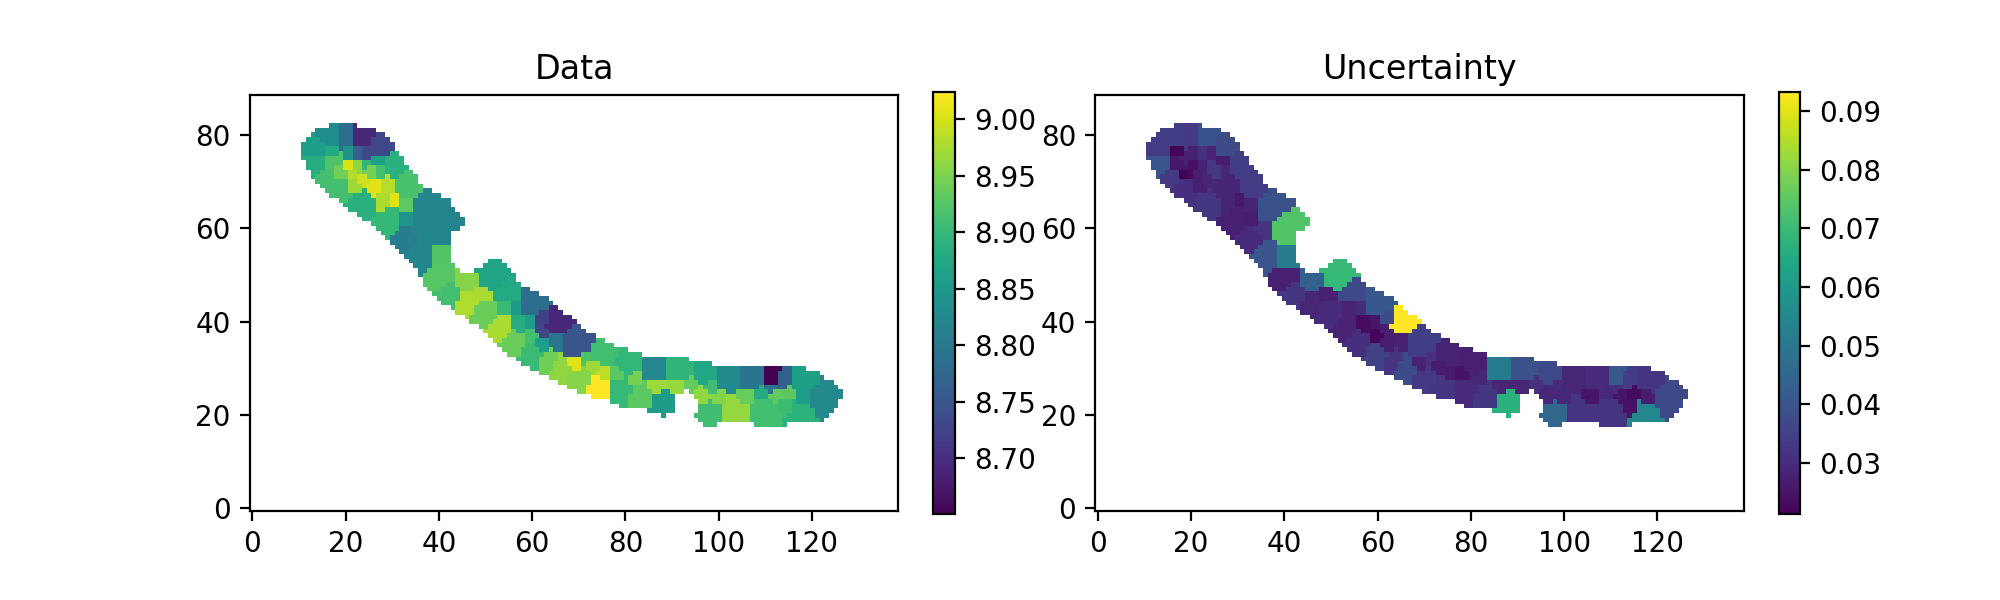

In [4]:
obs.plot()

Now let's choose a model, in this case a metallicity gradient.

Since this is a lensed model, we need to include the lensing information:
    
        - the general displacement maps in x and y (EXPLAIN THIS BETTER)
        - the redshift of the lens

In [5]:
model = Metallicity_Gradient(zlens=0.3,
              #dplx_path='Demo_data/A370_dplx.fits',
              #dply_path='Demo_data/A370_dply.fits')
              dplx_path='Demo_data/A370_no_lensing_dpl.fits',
              dply_path='Demo_data/A370_no_lensing_dpl.fits')

In [6]:
model.lensing_info()

Lens redshift: 0.3000
Displacement map (x): Demo_data/A370_no_lensing_dpl.fits
Displacement map (y): Demo_data/A370_no_lensing_dpl.fits


We can also check what are the model parameters

In [7]:
model_parameters = model.model_parameters(verbose=True)
print(model_parameters)

cx: x position of the centre (in pixels)
cy: y position of the centre (in pixels)
q: axis ratio (a/b)
pa: position angle (in degrees)
z_grad : gradient in dex/kpc
z_0: central metallicity
['cx', 'cy', 'q', 'pa', 'z_grad', 'z_0']


In [8]:
model.print_parameter_values()

cx: 0
cy: 0
q: 1.00
pa: 0.00
z_grad: -1.00
z_0: 0.00


The aligned displacement maps are not defined for x,y = (0,0), so let's change that already

In [9]:
model.cy = 50
model.cx = 50

All models (gradients but also velocity) are based on a distance map that is calculated in source plane and lensed to
image plane using the displacement maps.

However, the displacement maps given in dplx_path and dply_path, are the global displacement maps (i.e not calculated for a particular source redshift or position) and they need to be tweaked before a distance map for the source we are analysing can be produced.

If we try to create a distance map at this point, an error message will appear:

In [10]:
model.make_distance_map()

No displacement maps for a particular redshift were found.
It is not possible to create a distance map without them.
Use the "create_displacement_maps_for_object" method first.


Using the 'make_displacement_maps_for_object' for our observations (passing the observation object we created into this method), we fix this problem, by producing displacement maps at the correct redshift and aligned with our data, ready to be used.

In [11]:
model.create_displacement_maps_for_object(obs,correct_z=False)

If we now try again to obtain a distance map, it should work

<IPython.core.display.Javascript object>


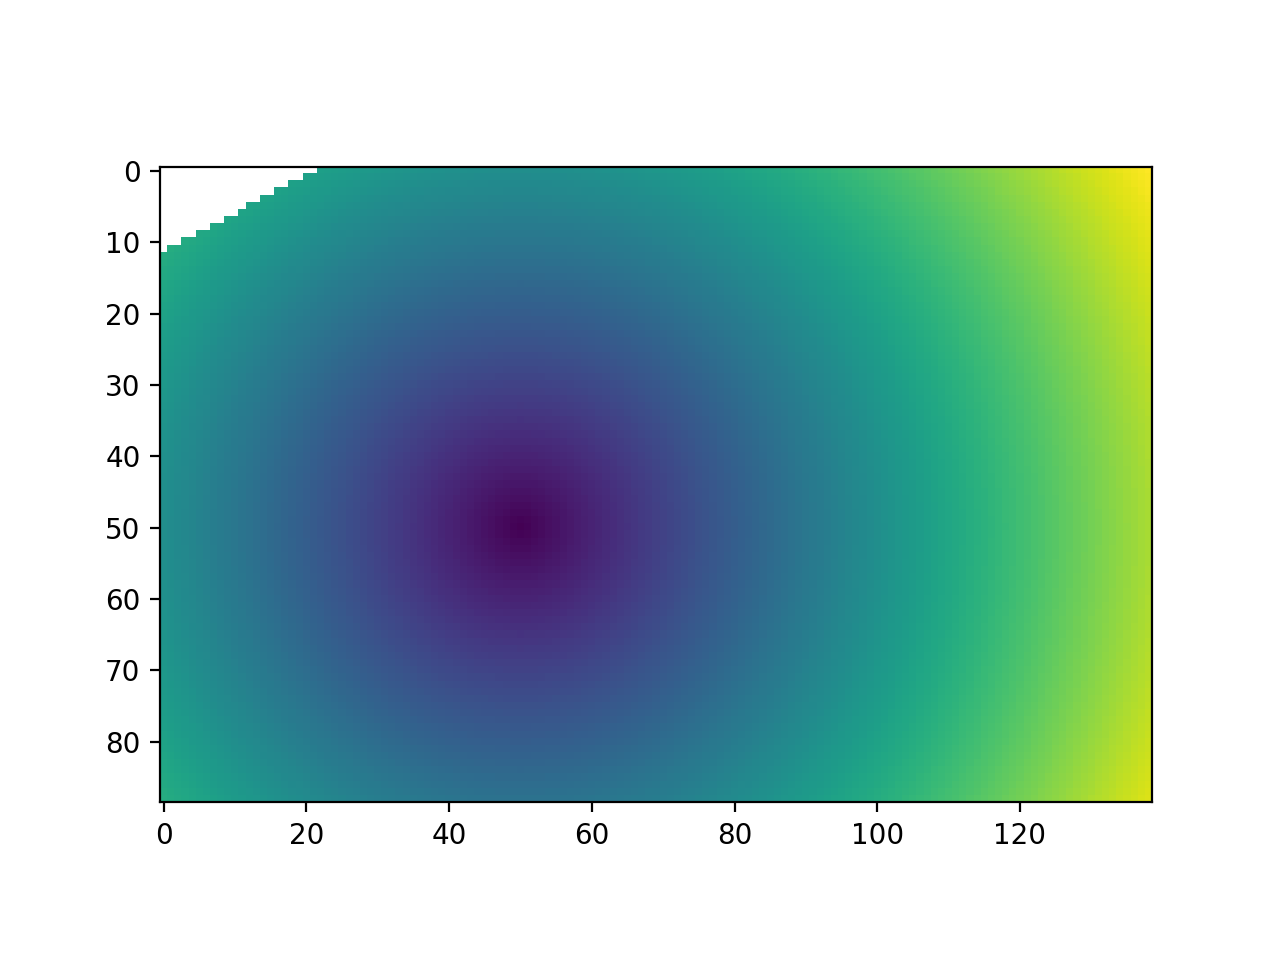

In [13]:
dist = model.make_distance_map()
plt.figure()
plt.imshow(dist)

We can also produce the actual model we are interested in (most of the times we won't need the distance map, this is just an intermediate step common to all models)

<IPython.core.display.Javascript object>


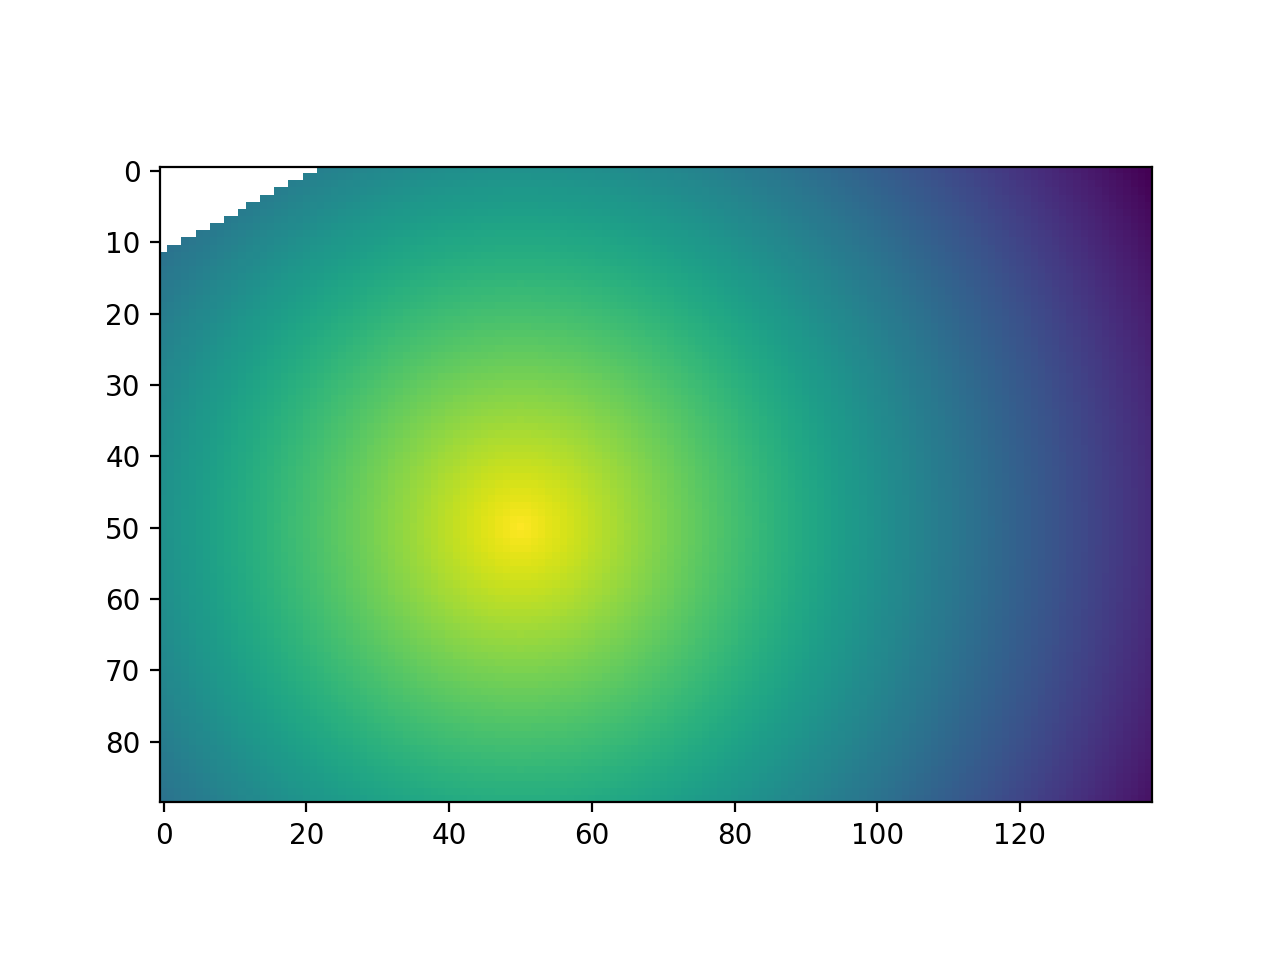

In [14]:
dummy_gradient = model.make_model()

plt.figure()
plt.imshow(dummy_gradient)

Our dummy gradient is indeed a bit dummy, since the initial parameters are not very sensible.

In [15]:
model.print_parameter_values()

cx: 50
cy: 50
q: 1.00
pa: 0.00
z_grad: -1.00
z_0: 0.00


We can update the parameters and get something nicer:

<IPython.core.display.Javascript object>


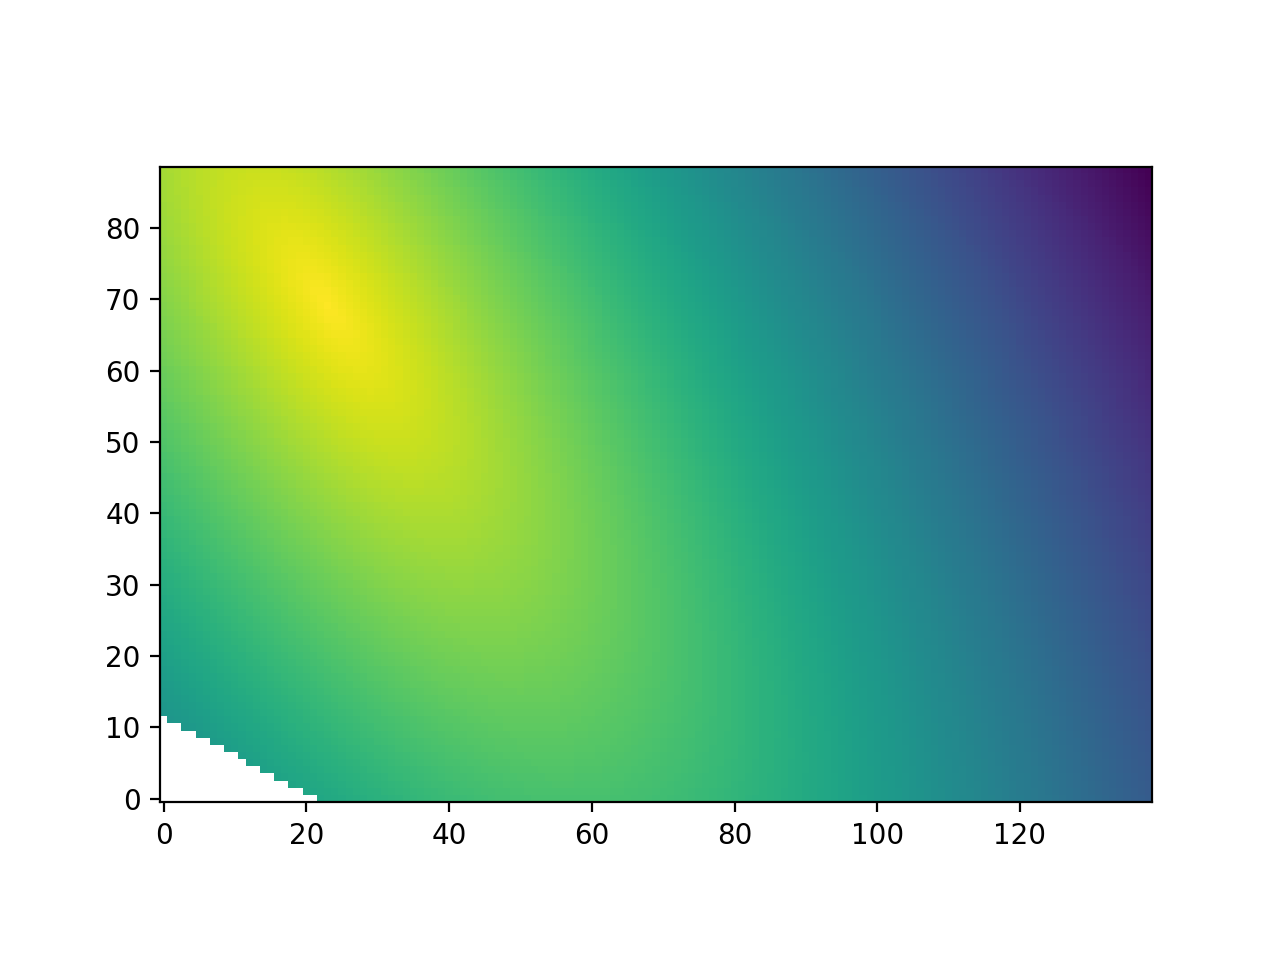

In [17]:
model.cx = 23
model.cy = 69
model.q = 0.4
model.pa = 60
model.z_grad = -0.2
model.z_0 = 8.5

more_sensible_model = model.make_model()

plt.figure()
plt.imshow(more_sensible_model,origin='lower')

The data is now also available in model.data and it can be directly showed with model.plot()

In [ ]:
model.data
model.plot()

## Fitting

We use emcee to fit a model to data...

BLA BLA
assume uniform priors

We need both the model and the observation objects we made before, but we also have to build a dictionary that will containt the names of the parameters that are going to be fitted, and their upper and lower bounds.


In [ ]:
from fit_model import fit_model,make_input_parameter

The make_input_parameter is just a slightly more handy way to make the dictionary we need, but as long as you input something with this shape:

    {parameter_name1:{'value':X, 'min':Y, 'max':Z},
     parameter_name2:{'value':A, 'min':B, 'max':C},
     ...
     }
     
it should work

In [ ]:
#parameter_names = model.model_parameters()
input_par = make_input_parameter(name    = ('cx', 'cy',  'q', 'pa', 'z_grad', 'z_0'),
                                 value   = (  29,   23,  0.5,    0,    -0.02, 9.0),
                                 minimum = (  27,   21,  0.2,  -90,     -0.1, 8.5),
                                 maximum = (  31,   25,  0.8,   90,        0, 9.5))

print(input_par)

In [ ]:
out = fit_model(obs,model,input_par,'test',nsteps=5,nwalkers=24,mask=None,binning_map=None)

In [ ]:
from check_fit import check_convergence,make_cornerplot

In [ ]:
check_convergence('test')

In [ ]:
print('%d %%'%10)

In [ ]:
from astropy.io import fits
header = fits.getheader('/Users/vera/Arcs/AS1063/Data/DATACUBE_AS1063_ZAP_MAD_ZAP_Median.fits',)
header